Lines to connect kaagle to colab


In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download aryashah2k/mango-leaf-disease-dataset

 99% 102M/103M [00:00<00:00, 128MB/s]  
100% 103M/103M [00:00<00:00, 114MB/s]


In [ ]:
!unzip /content/mango-leaf-disease-dataset.zip

Archive:  /content/mango-leaf-disease-dataset.zip
  inflating: Anthracnose/20211008_124249 (Custom).jpg  
  inflating: Anthracnose/20211008_124250 (Custom).jpg  
  inflating: Anthracnose/20211008_124252 (Custom).jpg  
  inflating: Anthracnose/20211008_124253 (Custom).jpg  
  inflating: Anthracnose/20211008_124256 (Custom).jpg  
  inflating: Anthracnose/20211008_124301 (Custom).jpg  
  inflating: Anthracnose/20211008_124302 (Custom).jpg  
  inflating: Anthracnose/20211008_124305 (Custom).jpg  
  inflating: Anthracnose/20211008_124306 (Custom).jpg  
  inflating: Anthracnose/20211008_124310 (Custom).jpg  
  inflating: Anthracnose/20211008_124312 (Custom).jpg  
  inflating: Anthracnose/20211008_124334 (Custom).jpg  
  inflating: Anthracnose/20211008_124336 (Custom).jpg  
  inflating: Anthracnose/20211008_124341 (Custom).jpg  
  inflating: Anthracnose/20211008_124345 (Custom).jpg  
  inflating: Anthracnose/20211008_124457 (Custom).jpg  
  inflating: Anthracnose/20211008_124501 (Custom).jpg 

Different Libraries that are used in the model


In [ ]:
import matplotlib.pyplot as plt # for plotting and image reading and shoeing
import numpy as np # for various mathematical calculations and array conversion
import cv2 # computer vision used for various image related functions it provides
import os # for various directory function
import tensorflow as tf  # deep learning library

from tensorflow import keras # sub deep learning library
from tensorflow.keras import layers  # used for different layers in a cnn
from tensorflow.keras.models import Sequential # to create a sequential model

As the data was in different directories so we first have the address of different directories into their respective directories.

In [ ]:
Anthracnose = os.listdir('/content/Anthracnose')
Bacterial = os.listdir('/content/Bacterial Canker')
Cutting = os.listdir('/content/Cutting Weevil')
Die = os.listdir('/content/Die Back')
Gall = os.listdir('/content/Gall Midge')
Healthy = os.listdir('/content/Healthy')
Powdery = os.listdir('/content/Powdery Mildew')
Sooty = os.listdir('/content/Sooty Mould')

Creating a dictionary with corresponding class and the address for its diseases.

In [ ]:
dict = {"Anthracnose":Anthracnose , "Bacterial Canker":Bacterial, "Cutting Weevil": Cutting , "Die Back": Die, "Gall Midge":Gall, "Healthy": Healthy,"Powdery Mildew":Powdery,"Sooty Mould": Sooty}

Labels dictionary is the dicotionary which will give us the integer value for different classes.As the model will give result in the form of integer

In [ ]:
labels = {"Anthracnose":0,  "Bacterial Canker":1, "Cutting Weevil":2,"Die Back":3,"Gall Midge":4,"Healthy":5,"Powdery Mildew":6,"Sooty Mould":7}

In [ ]:
dir = {"Anthracnose":"/content/Anthracnose/",  "Bacterial Canker":"/content/Bacterial Canker/", "Cutting Weevil":"/content/Cutting Weevil/","Die Back":"/content/Die Back/","Gall Midge":"/content/Gall Midge/","Healthy":"/content/Healthy/","Powdery Mildew":"/content/Powdery Mildew/","Sooty Mould":"/content/Sooty Mould/"}

Here we are creating our X and y varibale which is the attribute and the target varibale.

In [ ]:
X, y = [], []

for name, images in dict.items():  # for every class name and the image directory in the dictionary dict
    for image in images: # for every image in the image directory
        img = cv2.imread(dir[name]+str(image)) # readng the image using opencv function
        resized_img = cv2.resize(img,(180,180))  # resizing the image to create the uniformity
        X.append(resized_img)
        y.append(labels[name])

Converting the list into array

In [ ]:
X = np.array(X)
y = np.array(y)

Spiltting the dataset into train and test in the ratio of 8:2

In [ ]:
from sklearn.model_selection import train_test_split
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size =0.2, random_state=0)

splitting the data to training and validation and then scaling the train and test to float between (-1,1)

In [ ]:
X_train, X_val, y_train, y_val =  train_test_split(X_t, y_t, test_size =0.2, random_state=0)
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

The skeleton of the cnn with a class of 8 disease

In [ ]:
num_classes = 8
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



Fitting the model

In [ ]:
model_history= model.fit(X_train_scaled, y_train, validation_data = (X_val,y_val),epochs = 10)

Epoch 1/10
80/80 [==============================] - 14s 39ms/step - loss: 1.3891 - accuracy: 0.4844 - val_loss: 281.6983 - val_accuracy: 0.3891
Epoch 2/10
80/80 [==============================] - 2s 30ms/step - loss: 0.6430 - accuracy: 0.7648 - val_loss: 102.3841 - val_accuracy: 0.6125
Epoch 3/10
80/80 [==============================] - 3s 43ms/step - loss: 0.3722 - accuracy: 0.8684 - val_loss: 239.9751 - val_accuracy: 0.5844
Epoch 4/10
80/80 [==============================] - 2s 31ms/step - loss: 0.2999 - accuracy: 0.8965 - val_loss: 267.6516 - val_accuracy: 0.5234
Epoch 5/10
80/80 [==============================] - 2s 31ms/step - loss: 0.1431 - accuracy: 0.9539 - val_loss: 192.2790 - val_accuracy: 0.6547
Epoch 6/10
80/80 [==============================] - 2s 31ms/step - loss: 0.0885 - accuracy: 0.9770 - val_loss: 122.0015 - val_accuracy: 0.7609
Epoch 7/10
80/80 [==============================] - 2s 27ms/step - loss: 0.1454 - accuracy: 0.9563 - val_loss: 305.4472 - val_accuracy: 0.559

In [ ]:
model.evaluate(X_test_scaled,y_test) # checking the model

25/25 [==============================] - 1s 15ms/step - loss: 0.3429 - accuracy: 0.9112


[0.34289833903312683, 0.9112499952316284]

In [ ]:
model.save("adamax.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Plotting the graph of training accuracy and loss

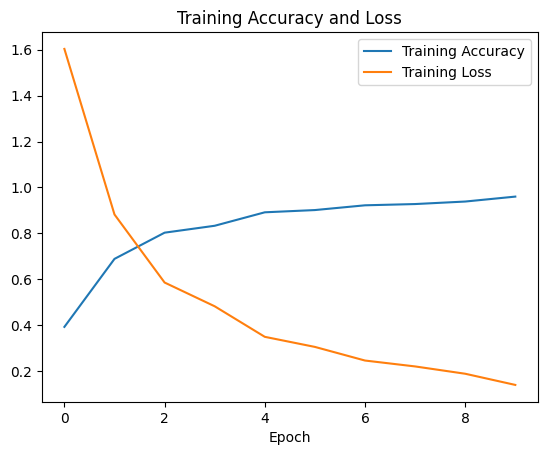

In [ ]:
plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.plot(model_history.history['loss'], label='Training Loss')

plt.title('Training Accuracy and Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
model_history

In [ ]:
len(model_history)

TypeError: ignored

Code to test out the model with real life test case outside of the dataset

In [ ]:
def test(img_src):
  l = {0:"Anthracnose",  1: "Bacterial Canker",2: "Cutting Weevil",3:"Die Back",4:"Gall Midge",5:"Healthy",6:"Powdery Mildew",7:"Sooty Mould"}
  i=plt.imread(img_src)
  plt.imshow(i)
  img1 = cv2.imread(img_src,cv2.IMREAD_GRAYSCALE)
  img = cv2.cvtColor(img1, cv2.COLOR_GRAY2RGB)
  resized_img = cv2.resize(img,(180,180))
  reshaped_input = np.expand_dims(resized_img, axis=0)

  p = model.predict(reshaped_input)
  label = l[p.argmax()]
  print(label)

1/1 [==============================] - 0s 30ms/step
Bacterial Canker


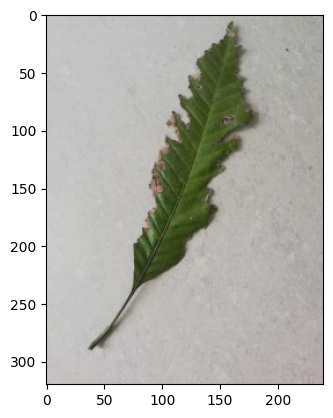

In [ ]:
test('./bacterialtest.jpg')

1/1 [==============================] - 0s 19ms/step
Die Back


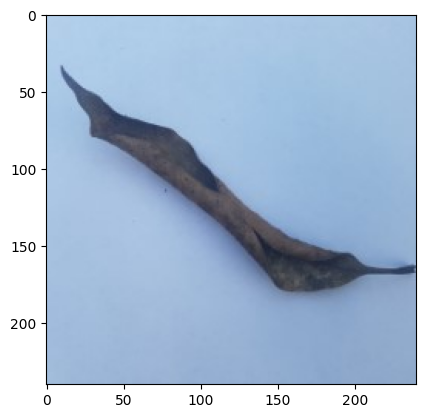

In [ ]:
test('./die.jpg')

1/1 [==============================] - 0s 25ms/step
Gall Midge


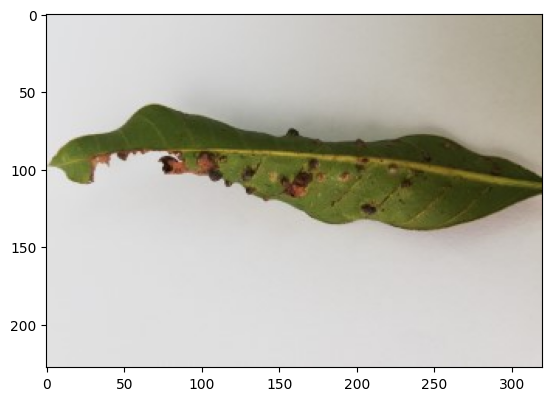

In [ ]:
test('./g.jpg')